In [1]:
import json
import base64
from PIL import Image
from rag_search.vector_db import VectorDatabase

c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#### LOAD API KEYS
with open("../keys/mvp_projects_key.txt","r") as f:
    openai_key = f.read()

In [3]:
#### INITIATE VECTOR CLASS
vec = VectorDatabase(
    text_embedding_model = "openai-text-embedding-3-small",
    image_embedding_model = "local-clip-vit-base-patch32",
    response_model = "openai-gpt-4o",
    captioning_model = "openai-gpt-4v",
    openai_api_key = openai_key,
    save_dir = None # assign to default save directory
    )

Loading CLIP base embedder


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [4]:
#### VECTORIZE ALL FILES IN FOLDER
vec.vectorize_folder(folder_path = 'rag_search/data')

File Microsoft_FY25Q3_PressRelease.pdf already processed - skipping
File Microsoft_FY25Q3_Results.pptx already processed - skipping


In [5]:
#### SEARCH FOR RESPONSE
query = {
    "text": "How has Microsoft's revenue grown in recent years?"
    }

response = vec.run_search(
    search_content = query, 
    search_location = None # WHOLE DATABASE
)

print(json.dumps(response, indent=2))

No specific search granularity provided - searching full database
Commencing search of databse
Searching text vs text - returned range len: 272
Top Similarity Scores: [0.68846629 0.64680376 0.64300131 0.63393193 0.63232826]


c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\rag_search\vector_db.py:710: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_references['search_reference'] = text


Searching text vs images - returned range len: 21
Top Similarity Scores: [0.3105975  0.30463886 0.2930162  0.28787455 0.27926272]


c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\rag_search\vector_db.py:727: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_references['search_reference'] = text


{
  "response": "In recent years, Microsoft's revenue has experienced significant growth across various segments:\n\n1. **Microsoft 365**:\n   - Microsoft 365 Commercial saw an 11% increase in revenue, with a 12% rise in cloud revenue. \n   - Microsoft 365 Consumer achieved a 10% increase in both overall and cloud revenue, supported by subscriber growth.\n\n2. **LinkedIn**:\n   - LinkedIn's revenue increased by 7%, with a 9% growth in engagement as measured by session increase.\n\n3. **Dynamics**:\n   - Dynamics products reported an 11% boost in revenue, with Dynamics 365 experiencing a notable 16% growth.\n\n4. **More Personal Computing**:\n   - Windows OEM and Devices saw a 3% rise in revenue.\n   - Gaming revenue grew 5%, with Xbox content and services revenue increasing by 8%, although Xbox hardware revenue declined by 6%.\n   - Search and news advertising achieved a 21% revenue growth.\n\nOverall, these segments contributed to Microsoft achieving a 10% increase in total revenue, d

In [6]:
#### SEARCH FOR RESPONSE - SPECIFIC FOLDER
query = {
    "text": "What is the company's strategy on returning value to shareholders?"
    }

response = vec.run_search(
    search_content = query, 
    search_location = "rag_search/data/Microsoft_FY25Q3_PressRelease.pdf" # SPECIFIC FILE
)

print(json.dumps(response, indent=2))

Searching only in specified file: rag_search/data/Microsoft_FY25Q3_PressRelease.pdf
Commencing search of databse
Searching text vs text - returned range len: 251
Top Similarity Scores: [0.44390473 0.44283009 0.42318115 0.42316958 0.39910523]


c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\rag_search\vector_db.py:710: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_references['search_reference'] = text


Searching text vs images - returned range len: 0
Searching text vs images - returned range len: 0
{
  "response": "Microsoft's strategy for returning value to shareholders includes distributing earnings through dividends and share repurchases. In a recent financial period, Microsoft returned $9.7 billion to shareholders by utilizing these methods. This approach indicates a commitment to providing financial returns directly to shareholders as part of their overall strategy.",
  "sources": [
    {
      "doc_name": "rag_search\\data\\Microsoft_FY25Q3_PressRelease.pdf",
      "page_num": 5,
      "content_type": "text_chunk",
      "content_id": "25",
      "content_raw": "Earnings per share:"
    },
    {
      "doc_name": "rag_search\\data\\Microsoft_FY25Q3_PressRelease.pdf",
      "page_num": 1,
      "content_type": "text_chunk",
      "content_id": "0",
      "content_raw": "Microsoft returned $9.7 billion to shareholders in the form of dividends and share repurchases in the third"
 

In [7]:
#### SEARCH FOR RESPONSE
query = {
    "text": "What are the key product pillars of Microsoft's business model?"
    }

response = vec.run_search(
    search_content = query, 
    search_location = "rag_search/data" # SPECIFIC FOLDER (in this case, same as whole database as one folder only)
    )

print(json.dumps(response, indent=2))

Searching files in specified folder: rag_search/data
Commencing search of databse
Searching text vs text - returned range len: 272
Top Similarity Scores: [0.53626158 0.53495963 0.52476764 0.52407563 0.51067151]


c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\rag_search\vector_db.py:710: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_references['search_reference'] = text


Searching text vs images - returned range len: 21
Top Similarity Scores: [0.30697933 0.30051592 0.29050505 0.2879763  0.2740868 ]


c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\rag_search\vector_db.py:727: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_references['search_reference'] = text


{
  "response": "The key product pillars of Microsoft's business model are divided into three main segments:\n\n1. **Productivity and Business Processes:**\n   - Includes Microsoft 365 (Commercial and Consumer), LinkedIn, and Dynamics.\n   - Microsoft 365 Commercial cloud revenue grew 12% and Consumer cloud revenue grew 10%.\n   - LinkedIn revenue increased by 7%.\n   - Dynamics products and services saw an 11% increase, with Dynamics 365 growing by 16%.\n\n2. **Intelligent Cloud:**\n   - Focuses on Azure and other cloud services.\n   - Server products and cloud services revenue increased by 22%, driven by a 33% increase in Azure revenue.\n\n3. **More Personal Computing:**\n   - Encompasses Windows OEM, Xbox, and search advertising.\n   - Windows OEM and Devices saw a 3% revenue increase.\n   - Xbox content and services revenue rose 8%, although Xbox hardware revenue declined by 6%.\n   - Search and news advertising revenue increased by 21%.\n\nThese pillars highlight Microsoft's diver

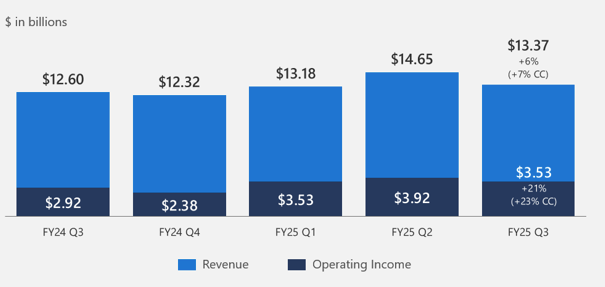

In [8]:
img = Image.open("./example_graph.png")
img

In [9]:
#### SEARCH FOR IMAGE
with open("./example_graph.png", "rb") as image_file:
    base64_image = base64.b64encode(image_file.read()).decode("utf-8")
    
query = {
    "text": "What drove this trend?",
    "image": [base64_image]
    }

response = vec.run_search(
    search_content = query, 
    search_location = None
)

print(json.dumps(response, indent=2))

No specific search granularity provided - searching full database
Commencing search of databse
Searching text vs text - returned range len: 272
Top Similarity Scores: [0.30150981 0.28403628 0.2805237  0.27754705 0.27613087]


c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\rag_search\vector_db.py:710: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_references['search_reference'] = text


Searching text vs images - returned range len: 21
Top Similarity Scores: [0.22438109 0.2227727  0.22160773 0.22142696 0.22097787]
Searching images vs images - returned range len: 21
Top Similarity Scores: [0.8546543 0.8307725 0.7839712 0.7592355 0.7567306]
['iVBORw0KGgoAAAANSUhEUgAAAl0AAAEfCAYAAAB7+nPRAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAGdYAABnWARjRyu0AAInHSURBVHhe7N13eBTl2sfx75Td9EISQgm9EzoiTZBuA6TaAQuI5YjYFex6QI56LMeOoCCCBUXpCEiRjiAYei8BAqT3bTPz/pHdfdPABtGE+3Ndcwm7m1nMtN88z/08o2RlZVkIIYQQQoiLSi3+ghBCCCGEuPAkdAkhhBBClAEJXUIIIYQQZUBClxBCCCFEGZDQJYQQQghRBiR0CSGEEEKUAQldQgghhBBlQEKXEEIIIUQZkNAlhBBCCFEGJHQJIYQQQpQBCV1CCCGEEGVAQpcQQgghRBmQ0CWEEEIIUQYkdAkhhBBClIHzhi5FUdA0rfjLRfzW+6XRNA1VLf2rVVX1r/P3/FkIIYQQojwoPfkAuq6TkZHB8uXLsdlsJUKSoih4PB5OnjyJYRhF3jsfy7I4c+YM2dnZKIpS5D1FUcjMzCQ5ObnInwHS09NJTU1FVVWys7M5c+YMlmUV+XkhhBBCiH+qUkOXqqpkZmaydOlSli1bxqxZs0hOTi7SuqSqKikpKbz66qvk5OSUCGWlUVUVl8vFhx9+yE8//YSu60Xe13WdZcuWMWPGDDRNY/ny5UydOhVN01iwYAFffvklISEhbNy4kSlTpuDxeEoENyGEEEKIf6ISS

c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\rag_search\vector_db.py:727: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_references['search_reference'] = text
c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\rag_search\vector_db.py:750: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_image_references['search_reference'] = img


{
  "response": "The trend in revenue and operating income, as shown in the chart, is driven by several factors:\n\n1. **Search and News Advertising**: This segment saw a significant 21% revenue growth, driven by higher revenue per search and increased search volume. This suggests robust performance in advertising.\n\n2. **Microsoft 365 and Dynamics 365 Growth**: The Productivity and Business Processes segment experienced a 10% growth in revenue, fueled by Microsoft 365 Commercial cloud and Dynamics 365.\n\n3. **Intelligent Cloud**: This segment had a 21% growth, primarily driven by Azure and other cloud services, which have seen strong demand.\n\n4. **Personal Computing**: This segment showed a 6% revenue growth, with contributions from Windows OEM and Xbox content.\n\n5. **Currency Impacts**: Adjustments for constant currency also show strong growth across these segments, indicating underlying market strength beyond currency fluctuations.\n\nOperating income growth was driven by incr